In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bank_data=pd.read_csv("bank_marketing .csv")

In [3]:
bank_data

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,no


In [4]:
# Checking for unknown values

In [5]:
# checking for any null value in age column

In [6]:
bank_data.iloc[:,0].isnull().values.any()

False

In [7]:
# checking for any null value in job column

In [8]:
bank_data.iloc[:,1].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
# calculating the percentage of unknown variable in job column

In [10]:
(bank_data.iloc[:,1].value_counts()/len(bank_data))*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [11]:
# Removing the rows having unknown variable in job column since the percentage of of unknown variable is less than 5%

In [12]:
bank_data = bank_data.drop(bank_data[bank_data.job =='unknown'].index)

In [13]:
bank_data.iloc[:,1].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [14]:
# checking for any null value in marital column

In [15]:
bank_data.iloc[:,2].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [16]:
# checking for any null value in education column

In [17]:
bank_data.iloc[:,3].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

In [18]:
# calculating the percentage of unknown variable in education column

In [19]:
(bank_data.iloc[:,3].value_counts()/len(bank_data))*100

secondary    51.490328
tertiary     29.521626
primary      15.137012
unknown       3.851034
Name: education, dtype: float64

In [20]:
# Removing the rows having unknown variable in education column since the percentage of of unknown variable is less than 5%

In [21]:
bank_data = bank_data.drop(bank_data[bank_data.education=='unknown'].index)

In [22]:
bank_data.iloc[:,3].value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

In [23]:
# checking for any null value in credit column

In [24]:
bank_data.iloc[:,4].value_counts()

no     42411
yes      782
Name: credit, dtype: int64

In [25]:
# checking for any null value in balance column

In [26]:
bank_data.iloc[:,5].isnull().values.any()

False

In [27]:
# checking for any null value in housing column

In [28]:
bank_data.iloc[:,6].value_counts()

yes    24292
no     18901
Name: housing, dtype: int64

In [29]:
# checking for any null value in loan column

In [30]:
bank_data.iloc[:,7].isnull().values.any()

False

In [31]:
# checking for any null value in day column

In [32]:
bank_data.iloc[:,8].isnull().values.any()

False

In [33]:
# checking for any null value in duration column

In [34]:
bank_data.iloc[:,9].isnull().values.any()

False

In [35]:
# checking for any null value in campaign column

In [36]:
bank_data.iloc[:,10].isnull().values.any()

False

In [37]:
# checking for any null value in pdays column 
#number of days that passed by after the client was last contacted from a previous campaign

In [38]:
bank_data.iloc[:,11].isnull().values.any()

False

In [39]:
# checking for any null value in previous column

In [40]:
bank_data.iloc[:,12].isnull().values.any()

False

In [41]:
#checking for any null value in target variable column

In [42]:
bank_data.iloc[:,13].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [43]:
bank_data.head()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,217,1,-1,0,no


In [44]:
bank_data.tail()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,17,361,2,188,11,no


In [45]:
# Replacing the name of categorical variable in the column credit

In [46]:
bank_data['credit']=bank_data['credit'].replace(['yes','no'],['credit_yes','credit_no'])



In [47]:
#Replacing the name of categorical variable in the column housing

In [48]:
bank_data['housing']=bank_data['housing'].replace(['yes','no'],['housing_yes','housing_no'])


In [49]:
#Replacing the name of categorical variable in the column loan

In [50]:
bank_data['loan']=bank_data['loan'].replace(['yes','no'],['loan_yes','loan_no'])

In [51]:
bank_data

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,credit_no,2143,housing_yes,loan_no,5,261,1,-1,0,no
1,44,technician,single,secondary,credit_no,29,housing_yes,loan_no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,credit_no,2,housing_yes,loan_yes,5,76,1,-1,0,no
5,35,management,married,tertiary,credit_no,231,housing_yes,loan_no,5,139,1,-1,0,no
6,28,management,single,tertiary,credit_no,447,housing_yes,loan_yes,5,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,credit_no,825,housing_no,loan_no,17,977,3,-1,0,yes
45207,71,retired,divorced,primary,credit_no,1729,housing_no,loan_no,17,456,2,-1,0,yes
45208,72,retired,married,secondary,credit_no,5715,housing_no,loan_no,17,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,credit_no,668,housing_no,loan_no,17,508,4,-1,0,no


In [52]:
# Reindexing 

In [53]:
bankdata = bank_data.reset_index(drop = True)       
print(bankdata)  

       age           job   marital  education     credit  balance  \
0       58    management   married   tertiary  credit_no     2143   
1       44    technician    single  secondary  credit_no       29   
2       33  entrepreneur   married  secondary  credit_no        2   
3       35    management   married   tertiary  credit_no      231   
4       28    management    single   tertiary  credit_no      447   
...    ...           ...       ...        ...        ...      ...   
43188   51    technician   married   tertiary  credit_no      825   
43189   71       retired  divorced    primary  credit_no     1729   
43190   72       retired   married  secondary  credit_no     5715   
43191   57   blue-collar   married  secondary  credit_no      668   
43192   37  entrepreneur   married  secondary  credit_no     2971   

           housing      loan  day  duration  campaign  pdays  previous    y  
0      housing_yes   loan_no    5       261         1     -1         0   no  
1      housing_

In [54]:
bankdata.head()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,credit_no,2143,housing_yes,loan_no,5,261,1,-1,0,no
1,44,technician,single,secondary,credit_no,29,housing_yes,loan_no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,credit_no,2,housing_yes,loan_yes,5,76,1,-1,0,no
3,35,management,married,tertiary,credit_no,231,housing_yes,loan_no,5,139,1,-1,0,no
4,28,management,single,tertiary,credit_no,447,housing_yes,loan_yes,5,217,1,-1,0,no


In [55]:
bankdata.tail()

,age,job,marital,education,credit,balance,housing,loan,day,duration,campaign,pdays,previous,y
43188,51,technician,married,tertiary,credit_no,825,housing_no,loan_no,17,977,3,-1,0,yes
43189,71,retired,divorced,primary,credit_no,1729,housing_no,loan_no,17,456,2,-1,0,yes
43190,72,retired,married,secondary,credit_no,5715,housing_no,loan_no,17,1127,5,184,3,yes
43191,57,blue-collar,married,secondary,credit_no,668,housing_no,loan_no,17,508,4,-1,0,no
43192,37,entrepreneur,married,secondary,credit_no,2971,housing_no,loan_no,17,361,2,188,11,no


In [56]:
# bankdata.describe(include='all')

In [57]:
# Age Distribution 

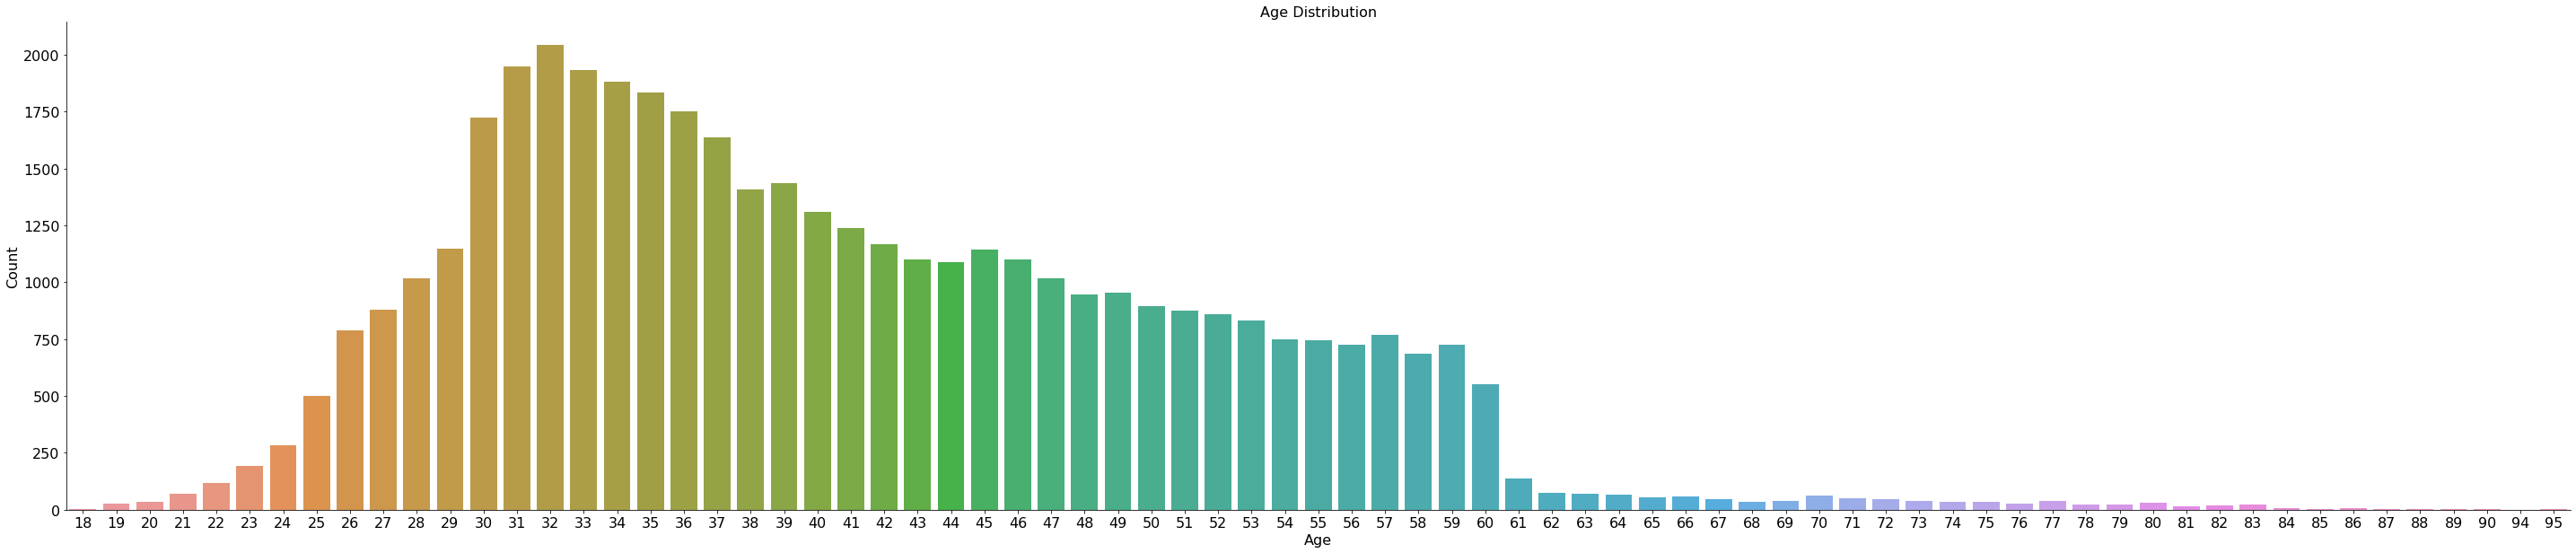

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(50,10)
sns.countplot(x = 'age', data = bankdata)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Age Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [59]:
# Age Distribution and relationship with y

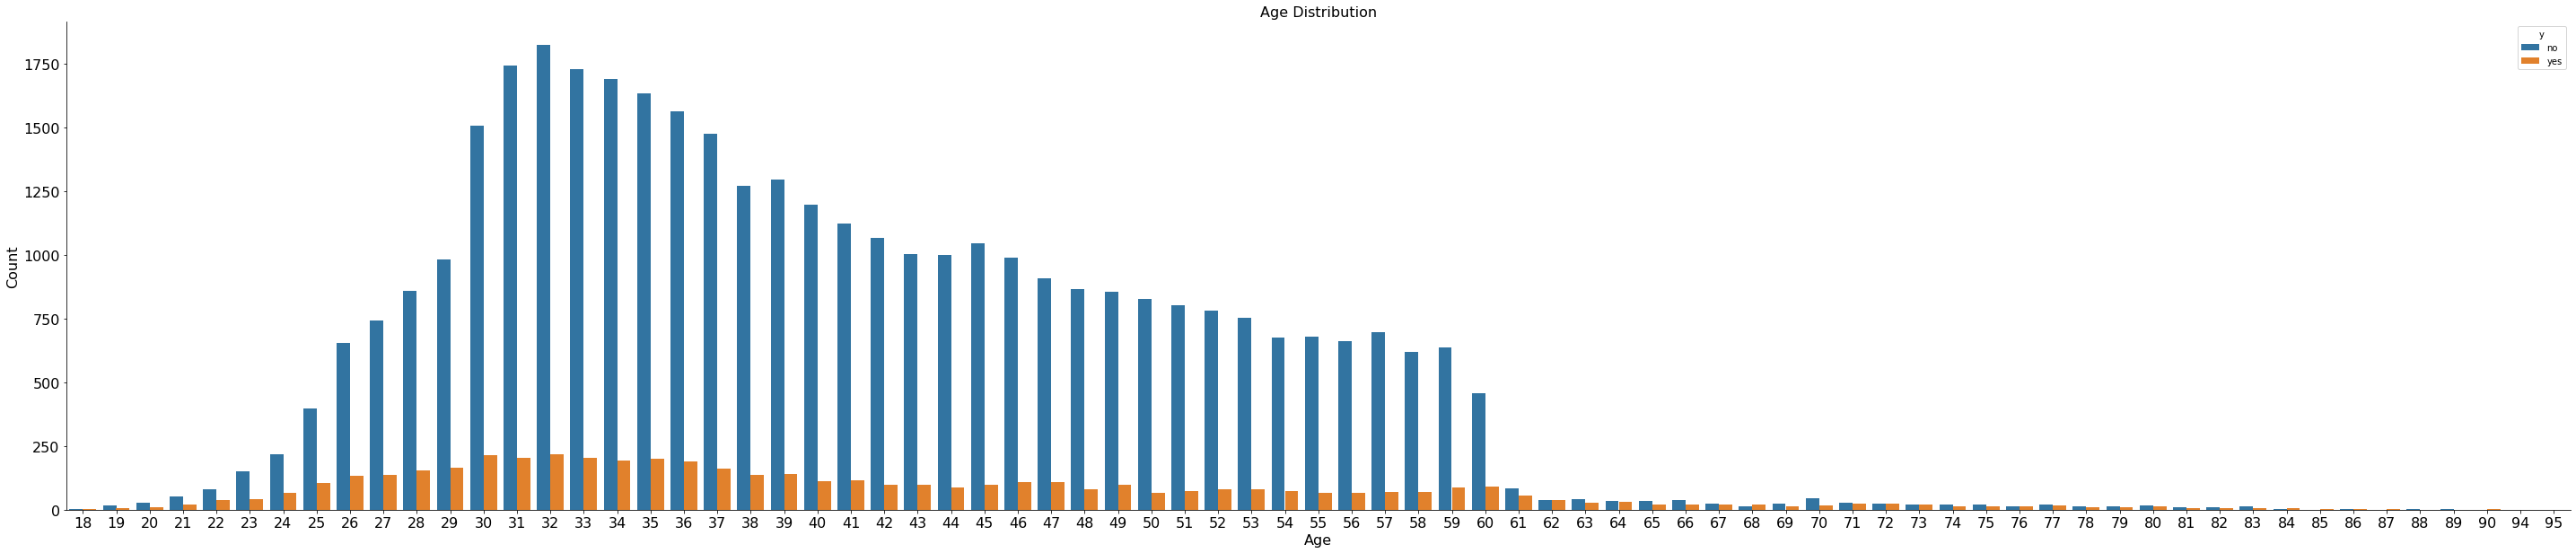

In [60]:
fig,ax = plt.subplots()
fig.set_size_inches(50,10)
sns.countplot(x = 'age',hue='y' ,data = bankdata)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Age Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()



In [61]:
# balance


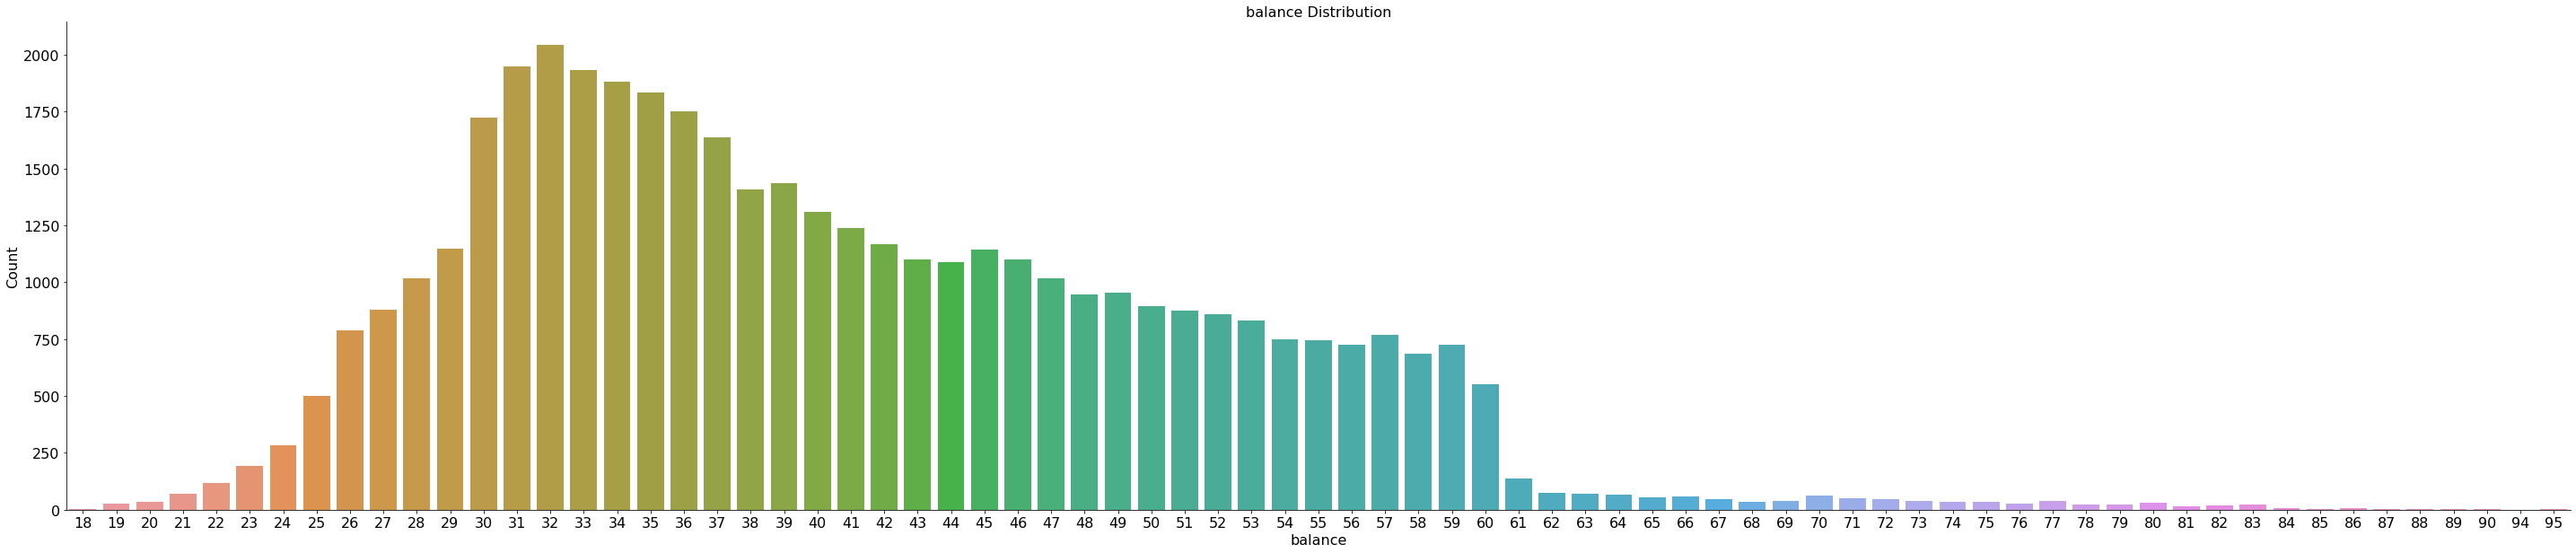

In [62]:
fig,ax = plt.subplots()
fig.set_size_inches(50,10)
sns.countplot(x = 'age', data = bankdata)
ax.set_xlabel('balance', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('balance Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

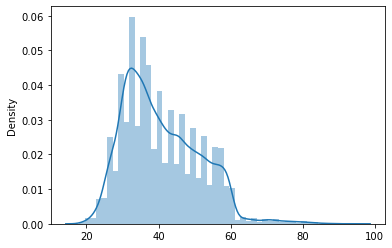

In [63]:
sns.distplot(x=bankdata['age'])

In [64]:
#  Job distribution of clients 

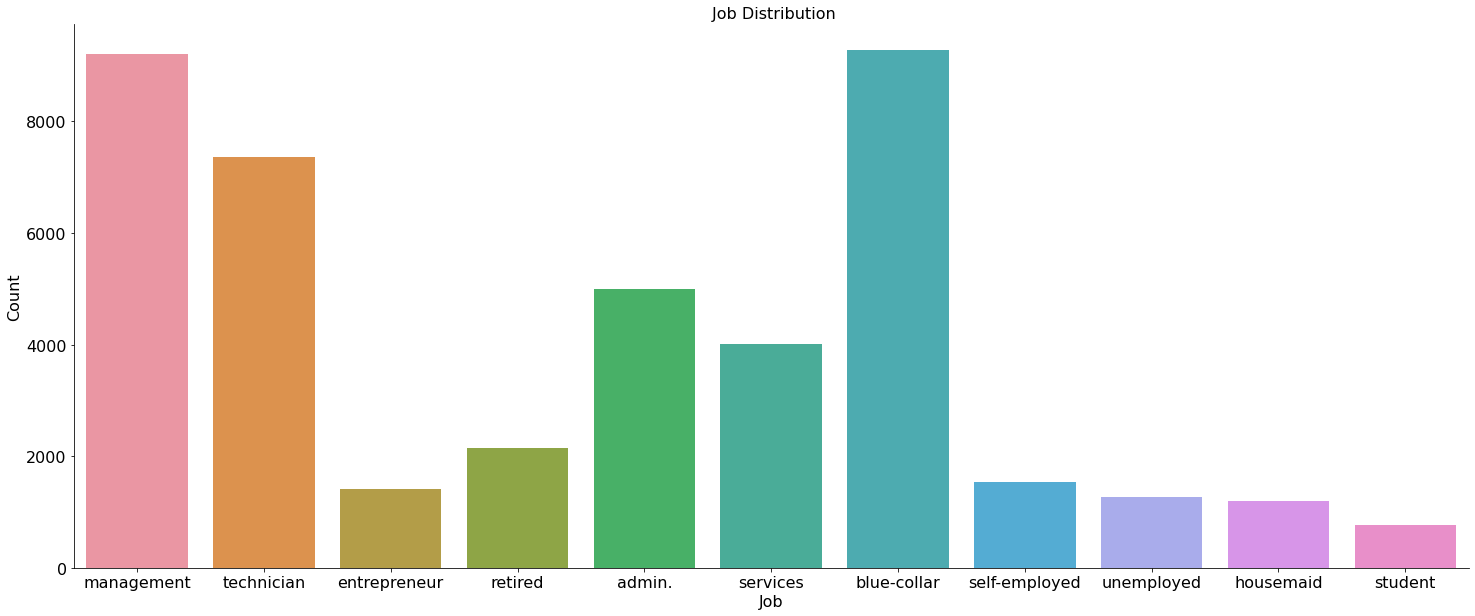

In [65]:
fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x = 'job', data = bankdata)
ax.set_xlabel('Job', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title(' Job Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [66]:
# Job Distribution and relationship with y

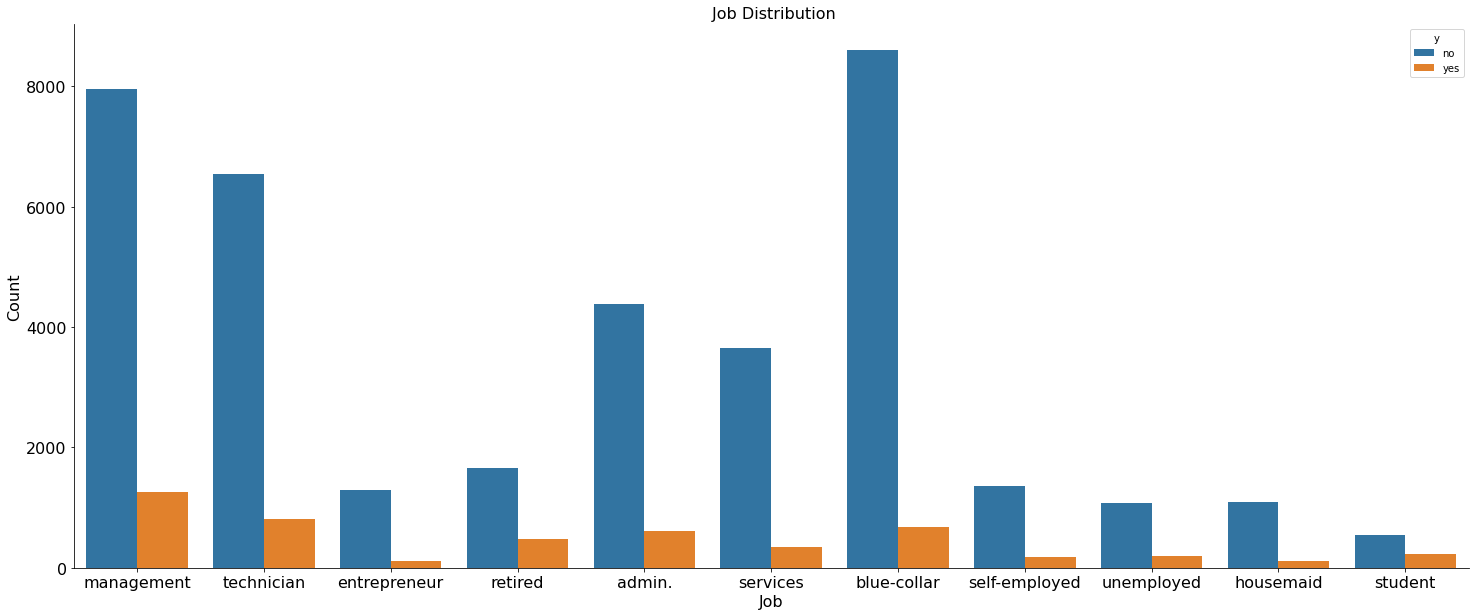

In [67]:
fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x = 'job',hue='y', data = bankdata)
ax.set_xlabel('Job', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title(' Job Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [68]:
#  Marital status Distribution of clients

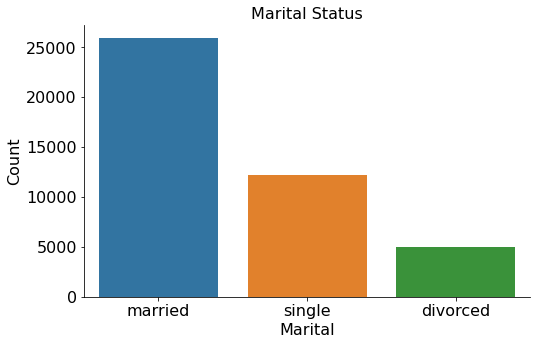

In [69]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'marital', data = bankdata)
ax.set_xlabel('Marital', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital Status', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [70]:
# Marital status Distribution and relationship with y

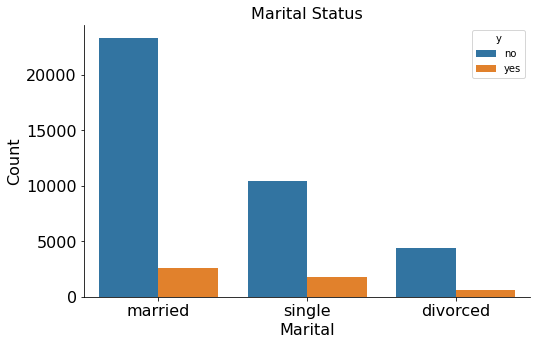

In [71]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'marital',hue='y',data = bankdata)
ax.set_xlabel('Marital', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital Status', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [72]:
# Education Distribution

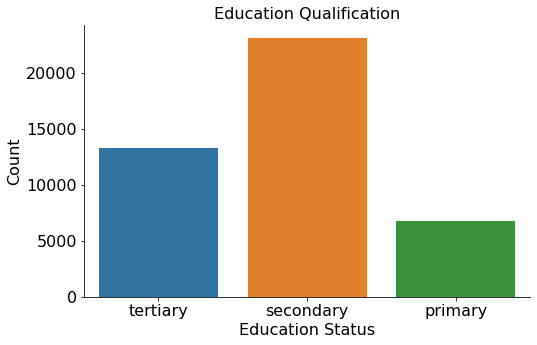

In [73]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'education', data = bankdata)
ax.set_xlabel('Education Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education Qualification', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [74]:
# Education Distribution and relationship with y

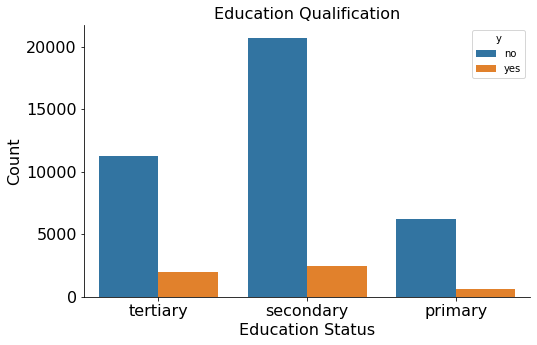

In [75]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'education',hue='y', data = bankdata)
ax.set_xlabel('Education Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education Qualification', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [76]:
# Credit Distribution

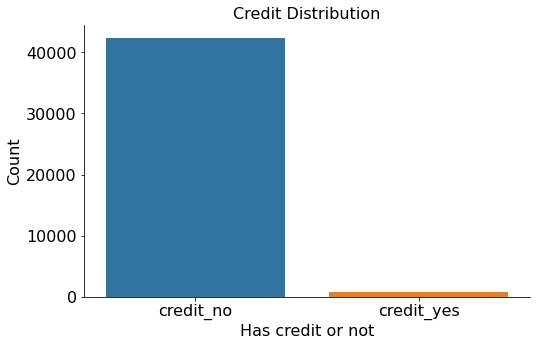

In [77]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'credit', data = bankdata)
ax.set_xlabel('Has credit or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Credit Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [78]:
# Credit Distribution and relationship with y

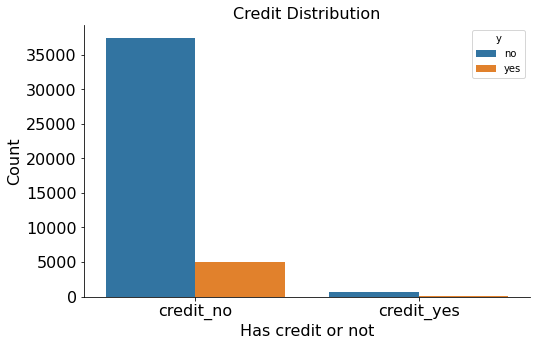

In [79]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'credit',hue='y', data = bankdata)
ax.set_xlabel('Has credit or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Credit Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [80]:
# Housing Distribution: has housing loan or not 

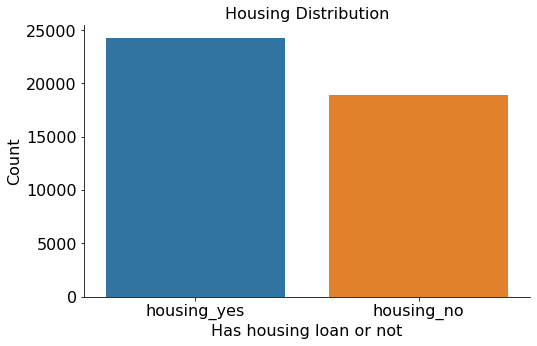

In [81]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'housing', data = bankdata)
ax.set_xlabel('Has housing loan or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Housing Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [82]:
# Housing Distribution and relationship with y

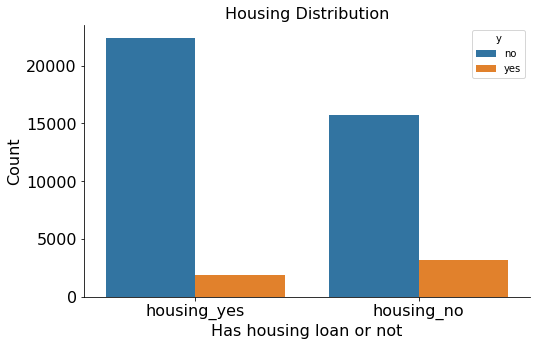

In [83]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'housing',hue='y', data = bankdata)
ax.set_xlabel('Has housing loan or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Housing Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [84]:
 # Distribution of loan: has personal loan or not

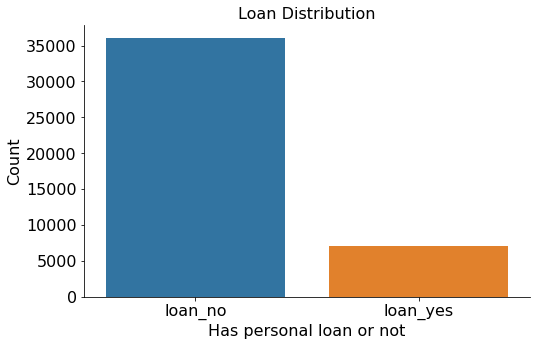

In [85]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'loan', data = bankdata)
ax.set_xlabel('Has personal loan or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Loan Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [86]:
# Distribution of loan and relationship with y

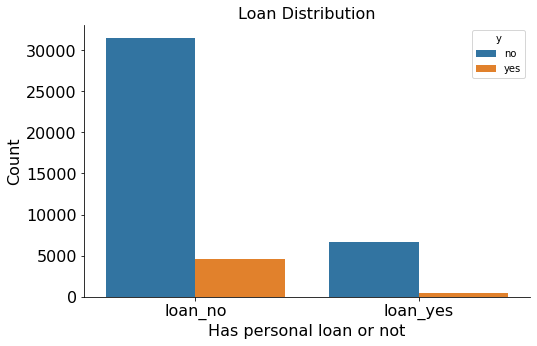

In [87]:
fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'loan', hue='y',data = bankdata)
ax.set_xlabel('Has personal loan or not', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Loan Distribution', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [88]:
# Distribution of target variable:subscription to term deposit

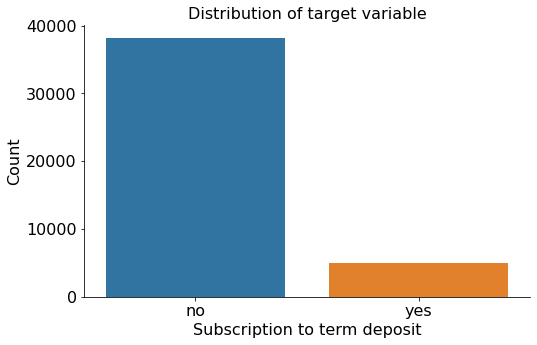

In [89]:

fig,ax = plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(x = 'y', data = bankdata)
ax.set_xlabel('Subscription to term deposit', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Distribution of target variable', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [90]:
#sns.lineplot(data=bankdata,x='day',y='count',hue='y')

In [91]:
#plt.plot(year, gdp)
#plt.grid(True)

In [92]:
# Age distrtibution of people who had subscribed a term deposit or not

<AxesSubplot:title={'center':'Subscription of term deposit based on age'}, xlabel='age', ylabel='Count'>

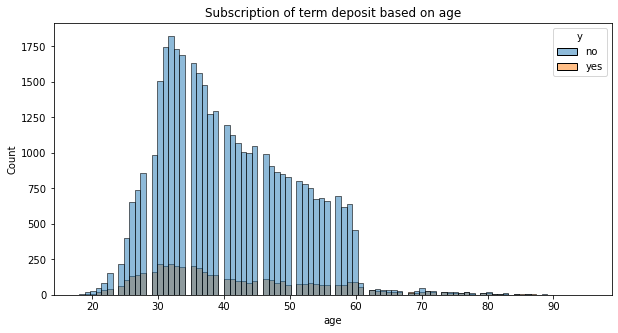

In [93]:
plt.figure(figsize=(10,5))
plt.title('Subscription of term deposit based on age')
sns.histplot(x='age',hue='y',data=bankdata)

In [94]:
# Heat Map

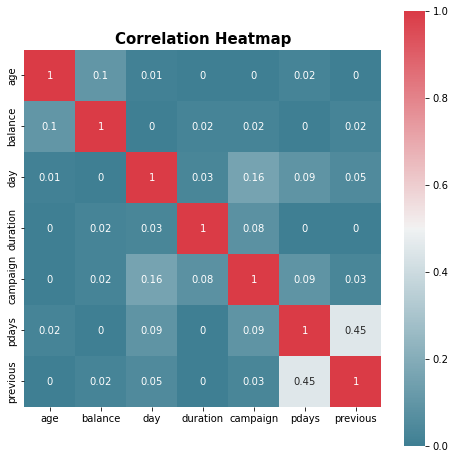

In [95]:
correlation = abs(round(bankdata.corr(), 2))
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation, annot= True,square= True, cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

In [96]:
from sklearn import preprocessing


In [97]:
enc=preprocessing.OneHotEncoder(drop='first')
enc.fit_transform(bankdata[['job','marital','education','credit','housing','loan','y']]).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [98]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary'], dtype=object),
 array(['credit_no', 'credit_yes'], dtype=object),
 array(['housing_no', 'housing_yes'], dtype=object),
 array(['loan_no', 'loan_yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [99]:
enc=preprocessing.OrdinalEncoder()

In [100]:
bankdata['y']=enc.fit_transform(bankdata['y'].values.reshape(-1,1))

In [101]:
enc=preprocessing.OneHotEncoder(drop='first')

In [102]:
onehots=enc.fit_transform(bankdata[['job','marital','education','credit','housing','loan']]).toarray()

In [103]:
cols=[]

In [104]:
for i in enc.categories_:
    i=np.delete(i,0)
    cols.extend(i)

In [105]:
bankdata=bankdata.join(pd.DataFrame(onehots,columns=cols))

In [106]:
bankdata=bankdata.drop(['job','marital','education','credit','housing','loan'],axis=1)

In [107]:
pd.set_option("display.max_columns", None)

In [108]:
bankdata

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,33,2,5,76,1,-1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,35,231,5,139,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,28,447,5,217,1,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,17,977,3,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
43189,71,1729,17,456,2,-1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43190,72,5715,17,1127,5,184,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43191,57,668,17,508,4,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
bankdata.describe(include='all')

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863,0.116246,0.214803,0.032667,0.027667,0.213368,0.049661,0.035654,0.092700,0.017943,0.170282,0.029496,0.600699,0.282893,0.535527,0.307040,0.018105,0.562406,0.164541
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672,0.320523,0.410691,0.177766,0.164017,0.409690,0.217246,0.185428,0.290015,0.132745,0.375885,0.169193,0.489760,0.450410,0.498742,0.461272,0.133332,0.496096,0.370770
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
# Target variable

In [111]:
bankdata.y.value_counts()

0.0    38172
1.0     5021
Name: y, dtype: int64

In [112]:
#Determining class feature and input features

In [113]:
# Check whether the data divided is correct

In [114]:
X= bankdata.iloc[:, bankdata.columns != 'y']

In [115]:
X

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,credit_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,33,2,5,76,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,35,231,5,139,1,-1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,28,447,5,217,1,-1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,17,977,3,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
43189,71,1729,17,456,2,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43190,72,5715,17,1127,5,184,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43191,57,668,17,508,4,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
X= bankdata.iloc[:, bankdata.columns != 'y'].values

In [117]:
y=bankdata.iloc[:,7].values

In [118]:
#Splitting dataset into training and test set

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [121]:
#Standardizing train and test dataset

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc=StandardScaler()

In [124]:
X_train_s=sc.fit_transform(X_train)

In [125]:
X_test_s=sc.transform(X_test)

In [126]:
# Handling the imbalance target data

In [127]:
#from imblearn.over_sampling import SMOTE 

In [128]:
#print(bankdata['y'].value_counts())

In [129]:
#resampler=SMOTE(random_state=0)
#X_train_smote,y_train_smote=resampler.fit_resample(X_train_s,y_train)
#sns.countplot(x=y_train_smote)

In [130]:
#print(pd.Series(y_train_smote).value_counts())

In [131]:
#Training the model using KNN algorithm in scaled data

In [132]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=5)
classifier.fit(X_train_s,y_train)

KNeighborsClassifier(p=5)

In [133]:
#Predicting the test set results

In [134]:
y_pred=classifier.predict(X_test_s)

print(y_pred)

[0. 0. 0. ... 1. 0. 0.]


In [135]:
print(y_test)

[0. 0. 0. ... 0. 1. 0.]


In [136]:
# Evaluating the performance of scaled model

In [137]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix')
print(cm,'\n\n')
print('-----------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classification report\n')
print(result)

accuracy:0.89


confusion matrix
[[11116   377]
 [ 1083   382]] 


-----------------------------------------
classification report

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     11493
         1.0       0.50      0.26      0.34      1465

    accuracy                           0.89     12958
   macro avg       0.71      0.61      0.64     12958
weighted avg       0.87      0.89      0.87     12958



In [138]:
#Visualization of confusion Matrix

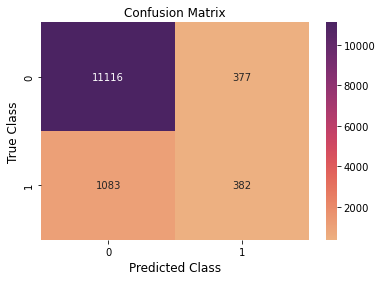

In [139]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [140]:
#***************************************************************************************************************************

In [141]:
#Training the model using KNN algorithm in smote data

In [142]:
X= bankdata.iloc[:, bankdata.columns != 'y'].values

In [143]:
y=bankdata.iloc[:,7].values

In [144]:
#Splitting dataset into training and test set

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [147]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:ylabel='count'>

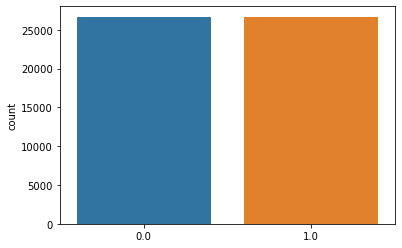

In [148]:
resampler=SMOTE(random_state=0)
X_train_smote,y_train_smote=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_smote)

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
sc=StandardScaler()

In [151]:
X_train_s=sc.fit_transform(X_train_smote)
X_test_s=sc.transform(X_test)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=5)
classifier.fit(X_train_s,y_train_smote)

KNeighborsClassifier(p=5)

In [153]:
y_pred=classifier.predict(X_test_s)

print(y_pred)

[0. 0. 0. ... 1. 1. 0.]


In [154]:
print(y_test)

[0. 0. 0. ... 0. 1. 0.]


In [155]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix')
print(cm,'\n\n')
print('-----------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classification report\n')
print(result)

accuracy:0.82


confusion matrix
[[9755 1738]
 [ 649  816]] 


-----------------------------------------
classification report

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89     11493
         1.0       0.32      0.56      0.41      1465

    accuracy                           0.82     12958
   macro avg       0.63      0.70      0.65     12958
weighted avg       0.87      0.82      0.84     12958



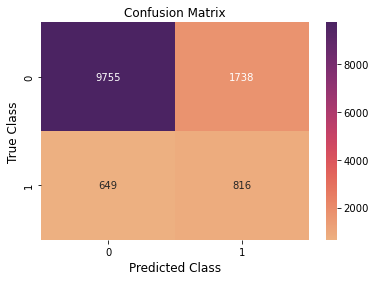

In [156]:
ax=sns.heatmap(cm,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()